In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D
from vis import plot_behav

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


In [2]:
until_day = 24
days = np.arange(1, until_day + 1, 1)

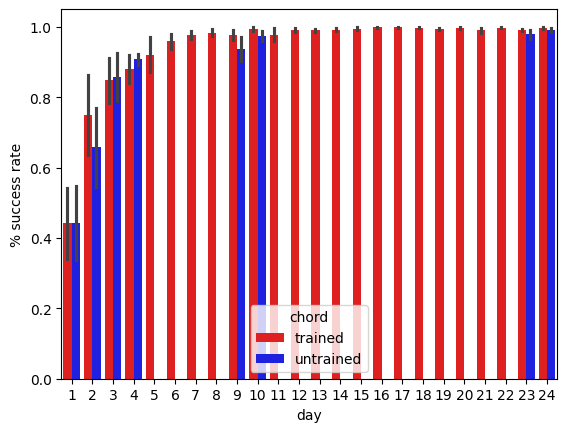

In [3]:
dat = pd.DataFrame()
sns = [101, 102, 103, 104, 105]

for sn in sns:
    for day in days:
        path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
        dat_tmp = pd.read_csv(path, sep='\t')
        dat = pd.concat([dat, dat_tmp], ignore_index=True)

dat = dat.groupby(['subNum', 'session', 'day', 'chord']).mean(numeric_only=True).reset_index()
sb.barplot(x='day', y='trialPoint', hue='chord', data=dat, errorbar='se', palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('% success rate')
plt.show()

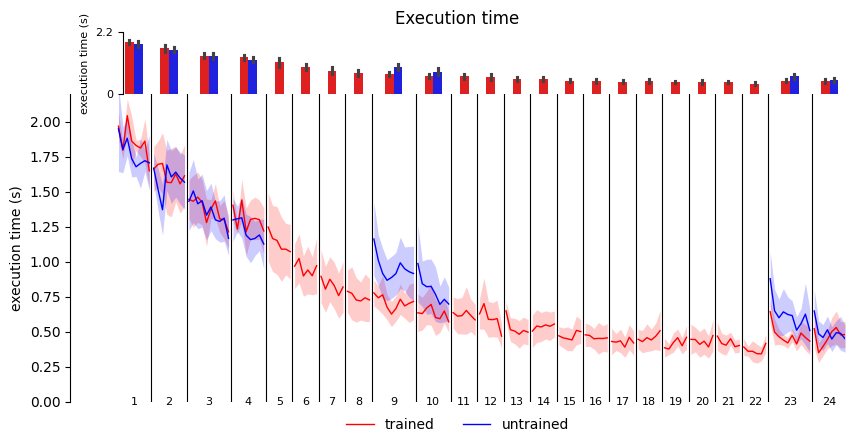

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, days, sns, metric='ET', ylim=[0, 2.2])
plt.show()

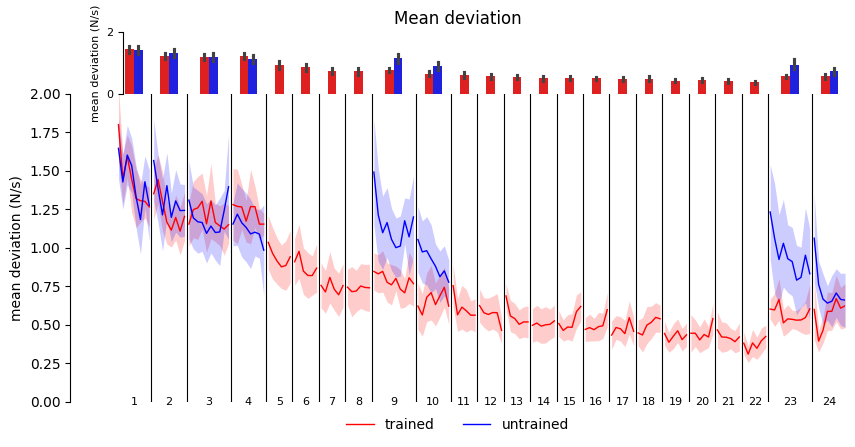

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, days, sns, metric='MD', ylim=[0, 2], ylabel='mean deviation (N/s)', title='Mean deviation',)
plt.show()

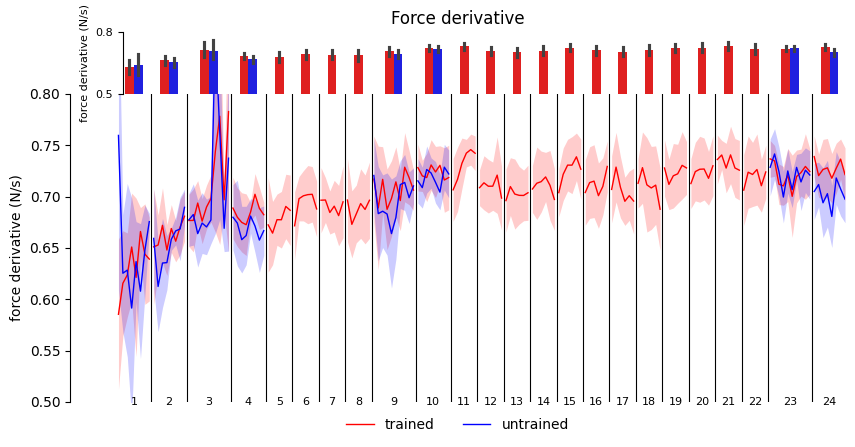

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, days, sns, metric='force_der', ylim=[.5, .8], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', ylabel='force derivative (N/s)', title='Force derivative', )
plt.show()

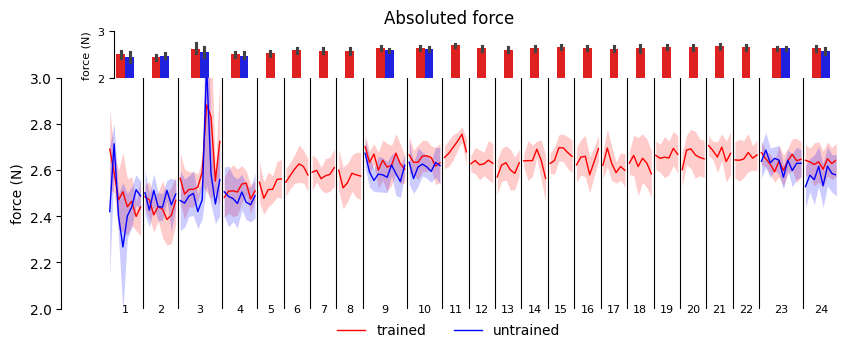

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_behav(fig, ax, days, sns, metric='force', ylim=[2, 3], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_abs', 'index_abs', 'middle_abs', 'ring_abs', 'pinkie_abs'], var_name='finger', ylabel='force (N)', title='Absoluted force', )
plt.show()

In [8]:
# check amount of force